In [1]:
from  google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/algo trading/stocks
### save and load data using pickle
import pickle
def psave(dataframe, fname):
    with open('{}.pkl'.format(fname),'wb') as pickle_file:
        pickle.dump(dataframe,pickle_file)
        
def pload(fname):
  
  with open('{}.pkl'.format(fname),'rb') as pickle_file:
      dataframe=pickle.load(pickle_file)
      return dataframe

Mounted at /content/drive
/content/drive/My Drive/algo trading/stocks


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import datetime

from itertools import product
import sys

In [3]:
sys.path.append("/content/drive/MyDrive/Colab Notebooks/classes")
%reload_ext autoreload
%autoreload 2
from trading_main import account
from PropertyTest_DataGeneration import Gen as g
from DfPlot import dp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
train_s=np.datetime64('2013-12-30')
train_e=np.datetime64('2017-12-29')

vali_s=np.datetime64('2018-01-02')
vali_e=np.datetime64('2018-12-31')

test_s=np.datetime64('2019-01-02')
test_e=np.datetime64('2019-12-30')
df=pload('selectedpairs_ARIMA')

df = df.rename(columns={'return': 'ret'})

In [5]:
StockData=pload('StockPool')

In [7]:
length=len(df.iloc[0]['ARIMA_vali'])

returnArima=[]
for i in range(len(df)):
  r=[]
  sp=df.iloc[i]['spread'].loc[vali_s:vali_e]
  for j in range(length-1):
    r.append((df.iloc[i]['ARIMA_vali'].iloc[j+1]-sp.iloc[j])/sp.iloc[j])


  inde=sp.iloc[:-1].index
  rr=pd.Series(r,index=inde)
  returnArima.append(rr)


In [8]:
df['ARIMA_vali_return']=returnArima

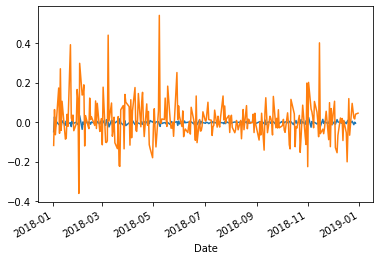

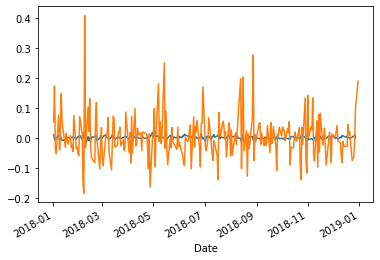

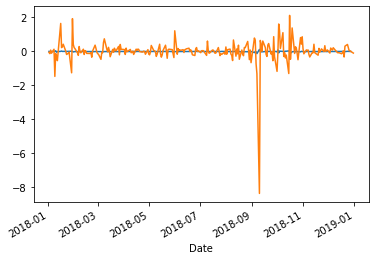

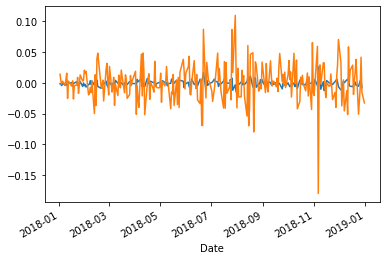

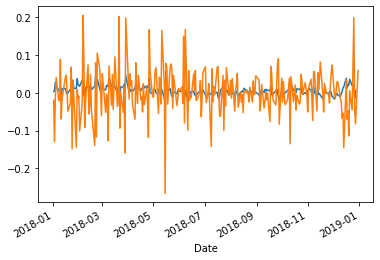

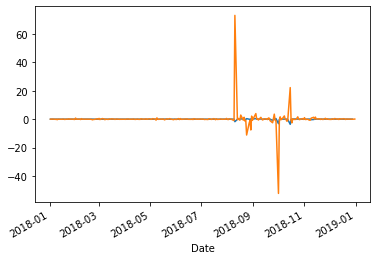

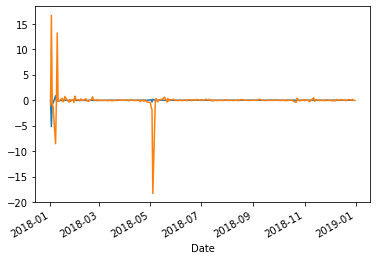

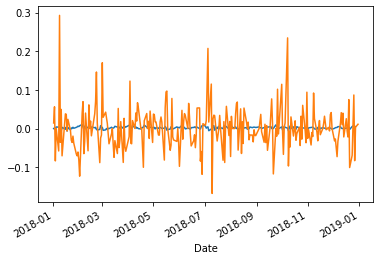

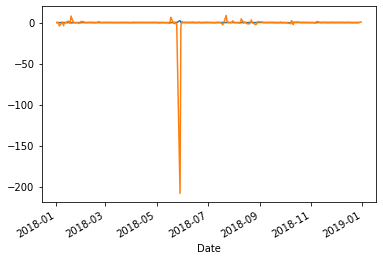

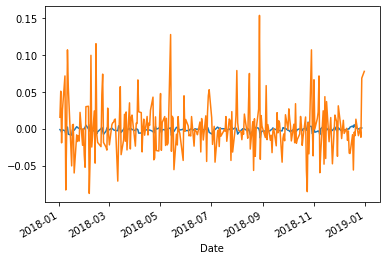

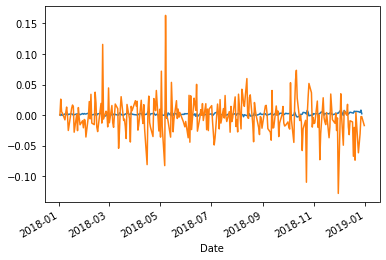

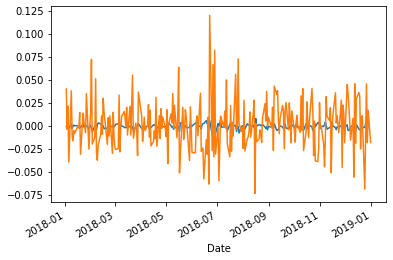

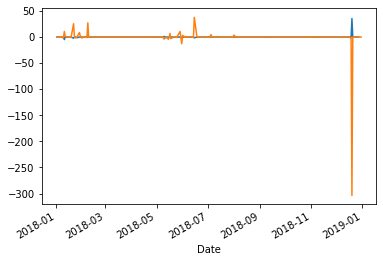

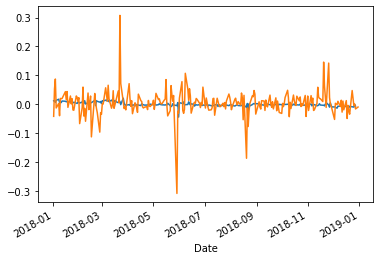

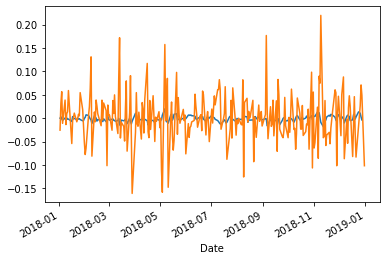

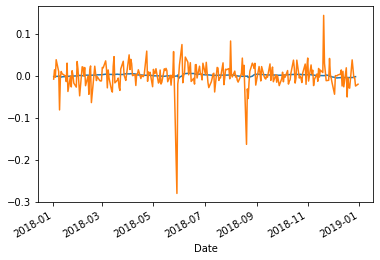

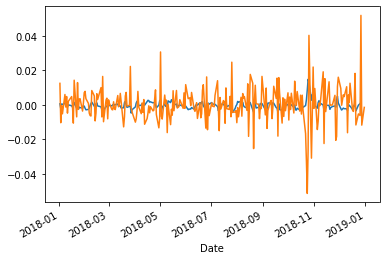

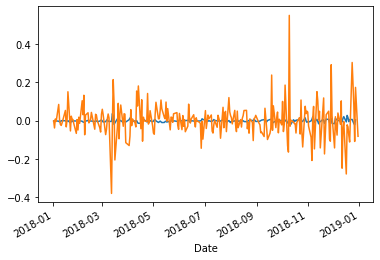

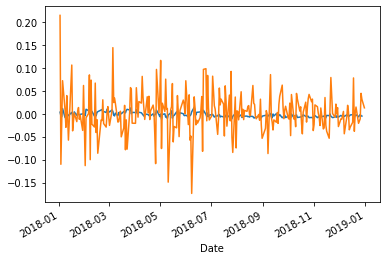

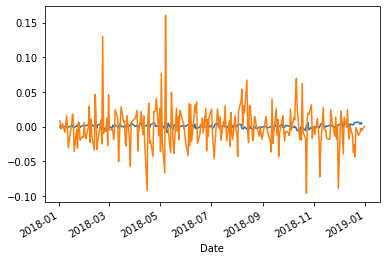

In [10]:
#actual return vs forecasted return 
for i in range(20):
  plt.figure(i)
  df.iloc[i]['ARIMA_vali_return'].plot()
  df.iloc[i]['ret'].loc[vali_s:vali_e].plot()

In [20]:
v={'train_var':[],'vali_var':[],'ARIMA_vali_var':[]}
for i in range(20):

  v['ARIMA_vali_var'].append(df.iloc[i]['ARIMA_vali_return'].var())
  v['vali_var'].append(df.iloc[i]['ret'].loc[vali_s:vali_e].var())
  v['train_var'].append(df.iloc[i]['ret'].loc[train_s:train_e].var())

In [23]:
d=pload('ARIMA_result')

In [24]:

for i in v:
  d[i]=v[i]

In [27]:
#the rate of return on the testing set using ARIMA forecasting
d['ARIMA_testreturn'].describe()

count    20.000000
mean     -0.000681
std       0.032010
min      -0.105264
25%       0.000000
50%       0.000000
75%       0.000000
max       0.091637
Name: ARIMA_testreturn, dtype: float64

In [26]:
#ARIMA model's MSE on the validation set
d['ARIMA_mse'].describe()

count    20.000000
mean      0.035083
std       0.021739
min       0.002403
25%       0.020967
50%       0.038823
75%       0.054572
max       0.064513
Name: ARIMA_mse, dtype: float64

In [29]:
#number of profitable pair
len(d.index[d['ARIMA_testreturn']>0])

1

In [30]:
#number of unprofitable pair
len(d.index[d['ARIMA_testreturn']<0])

1

In [31]:
#total number of trades
d['ARIMA_testtime'].sum()

6.0

In [32]:
#total number of unprofitable trades
d['ARIMA_losetime'].sum()

4

In [33]:
d['vv_diff']=d['vali_var']-d['ARIMA_vali_var']

In [34]:
#difference between variance of the actural return and ARIMA forecasted return
d['vv_diff'].describe()

count     20.000000
mean      29.513167
std       90.631164
min        0.000106
25%        0.000976
50%        0.002959
75%        0.122142
max      376.560051
Name: vv_diff, dtype: float64